In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import CMIknn

import time

Could not import r-package RCIT


/Users/jonathanbrulein/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in loadNamespace(name) : there is no package called ‘RCIT’

  warnings.warn(x, RRuntimeWarning)


In [2]:
df = pd.read_csv('data/lhomme_data.csv', index_col=0, parse_dates=True) # parse_dates : sinon ne sais pas modifier les dates lors du resampling
df = df.resample('D').mean() # rééchantillonage en intervalles journaliers
df[df.columns[1:3]]=df[df.columns[1:3]]*24  # ajustement pour la pluie (somme et pas moyenne)
df = df.loc['2015-06-21':'2015-09-22'] #échantillon d'été
#df = df.loc['2015-04-28':'2016-08-05'] #période où RG1 est 'complet'
df = df.diff() # pour retirer toute forme de saisonalité aux données
df = df.fillna(999) # remplissage des NaN par le nombre 999, détecté comme valeur manquante par la suite
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94 entries, 2015-06-21 to 2015-09-22
Freq: D
Data columns (total 6 columns):
DD [l.h^-1]       94 non-null float64
ET [mm]           94 non-null float64
RF [mm]           94 non-null float64
RG [nm.s^-2]      94 non-null float64
RG [nm.s^-2].1    94 non-null float64
SD [m^3.s^-1]     94 non-null float64
dtypes: float64(6)
memory usage: 5.1 KB


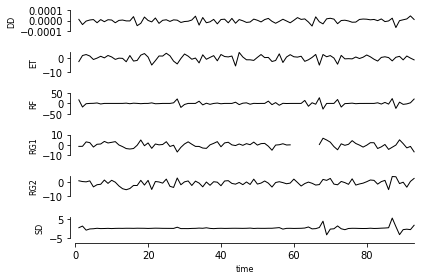

In [3]:
var_names = ['DD', 'ET', 'RF', 'RG1', 'RG2', 'SD']
dataframe = pp.DataFrame(df.values, 
                         datatime = np.arange(len(df.values)),
                         var_names=var_names, missing_flag=999)
tp.plot_timeseries(dataframe)
plt.show()

# PCMCI

- k-CMI = 0.1  (10% du nombre d'observations)
- k-perm = 10

In [4]:
start_time = time.time()

cmi_knn = CMIknn(significance='shuffle_test', knn=0.1, shuffle_neighbors=10)
pcmci_cmi_knn = PCMCI(
            dataframe=dataframe, 
            cond_ind_test=cmi_knn,
            verbosity=2)
results = pcmci_cmi_knn.run_pcmci(tau_max=2, pc_alpha=0.05)
pcmci_cmi_knn.print_significant_links(
       p_matrix = results['p_matrix'], 
       val_matrix = results['val_matrix'],
       alpha_level = 0.05)

                
print("--- %i secondes ---" % (time.time() - start_time))
print("--- %.2f minutes ---" % ((time.time() - start_time)/60))


##
## Running Tigramite PC algorithm
##

Parameters:
independence test = cmi_knn
tau_min = 1
tau_max = 2
pc_alpha = 0.05
max_conds_dim = None
max_combinations = 1



## Variable DD

Iterating through pc_alpha = [0.05]:

# pc_alpha = 0.05 (1/1):

Testing condition sets of dimension 0:

    Link (DD -1) --> DD (1/12):
    Combination 0:  --> pval = 0.24300 / val = 0.023
    Non-significance detected.

    Link (DD -2) --> DD (2/12):
    Combination 0:  --> pval = 0.09500 / val = 0.045
    Non-significance detected.

    Link (ET -1) --> DD (3/12):
    Combination 0:  --> pval = 0.46400 / val = 0.009
    Non-significance detected.

    Link (ET -2) --> DD (4/12):
    Combination 0:  --> pval = 0.70000 / val = -0.026
    Non-significance detected.

    Link (RF -1) --> DD (5/12):
    Combination 0:  --> pval = 0.74300 / val = -0.015
    Non-significance detected.

    Link (RF -2) --> DD (6/12):
    Combination 0:  --> pval = 0.76200 / val = -0.029
    Non-significance detected.

    Link

    Combination 0:  --> pval = 0.63100 / val = -0.009
    Non-significance detected.

    Link (SD -2) --> RG1 (12/12):
    Combination 0:  --> pval = 0.08900 / val = 0.036
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable RG1 has 2 parent(s):
        (DD -1): max_pval = 0.00000, min_val = 0.176
        (RG1 -1): max_pval = 0.04600, min_val = 0.067

Testing condition sets of dimension 1:

    Link (DD -1) --> RG1 (1/2):
    Combination 0: (RG1 -1)  --> pval = 0.04200 / val = 0.057
    No conditions of dimension 1 left.

    Link (RG1 -1) --> RG1 (2/2):
    Combination 0: (DD -1)  --> pval = 0.40200 / val = 0.003
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable RG1 has 1 parent(s):
        (DD -1): max_pval = 0.04200, min_val = 0.057

Algorithm converged for

        pval = 0.25500 | val = 0.008

        link (SD -1) --> DD (16/17):
        with conds_y = [ ]
        with conds_x = [ (RF -2) (SD -2) ]
        pval = 0.08100 | val = 0.017

        link (SD -2) --> DD (17/17):
        with conds_y = [ ]
        with conds_x = [ (RF -3) (SD -3) ]
        pval = 0.40900 | val = 0.005

        link (DD 0) --> ET (1/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ ]
        pval = 0.89500 | val = -0.036

        link (DD -1) --> ET (2/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.00000 | val = 0.195

        link (DD -2) --> ET (3/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ ]
        pval = 0.38900 | val = 0.016

        link (ET -1) --> ET (4/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (DD -2) ]
        pval = 0.23700 | val = 0.014

        link (ET -2) --> ET (5/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (DD -3) ]
        pval = 0.03500

        pval = 0.23000 | val = 0.017

        link (ET -1) --> RG2 (5/17):
        with conds_y = [ ]
        with conds_x = [ (DD -2) ]
        pval = 0.15200 | val = 0.027

        link (ET -2) --> RG2 (6/17):
        with conds_y = [ ]
        with conds_x = [ (DD -3) ]
        pval = 0.23600 | val = 0.022

        link (RF 0) --> RG2 (7/17):
        with conds_y = [ ]
        with conds_x = [ (RF -1) (SD -1) ]
        pval = 0.03000 | val = 0.036

        link (RF -1) --> RG2 (8/17):
        with conds_y = [ ]
        with conds_x = [ (RF -2) (SD -2) ]
        pval = 0.50000 | val = 0.002

        link (RF -2) --> RG2 (9/17):
        with conds_y = [ ]
        with conds_x = [ (RF -3) (SD -3) ]
        pval = 0.70000 | val = -0.015

        link (RG1 0) --> RG2 (10/17):
        with conds_y = [ ]
        with conds_x = [ (DD -1) ]
        pval = 0.00000 | val = 0.247

        link (RG1 -1) --> RG2 (11/17):
        with conds_y = [ ]
        with conds_x = [ (DD -2) ]
        pval =

In [5]:
# on sauve la matrice des p_valeurs et celles des valeurs de CMI estimée, 
# dans le dossier en cours, au format .npy, 
# histoire de garder une trace, pouf faire la carte causale quand on veut.
np.save('p_kcmi01_kperm10',results['p_matrix'])
np.save('val_kcmi01_kperm10',results['val_matrix'])

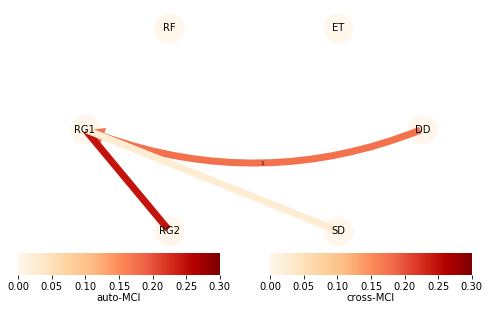

In [6]:
p = np.load('p_kcmi01_kperm10.npy')
val = np.load('val_kcmi01_kperm10.npy')

link_matrix = pcmci_cmi_knn.return_significant_parents(pq_matrix=p,
                                                       val_matrix=val,
                                                       alpha_level=0.01)['link_matrix']

# pour afficher uniquement les liens vers RG1
mb = np.zeros((6,6,3), dtype=bool)
mb[:,3,:] = link_matrix[:,3,:]
link_matrix = mb

tp.plot_graph(
    val_matrix=val,
    figsize=(7, 5),
    node_size=30,
    arrowhead_size=1.0,
    arrow_linewidth=35.0,
    link_matrix=link_matrix,
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmin_edges=0.,
    vmax_edges = 0.3,
    edge_ticks=0.05,
    cmap_edges='OrRd',
    vmin_nodes=0,
    vmax_nodes=.3,
    node_ticks=.05,
    cmap_nodes='OrRd',
    )
plt.show()

# Boucles de PCMCI

- k-CMI = [0.05, 0.1, 0.2, 0.5, 1]
- k-perm = [2, 5, 10, 25]

D'après la cartes causale du dessus, il y a trois liens dirégés (ou non) vers RG1.
 
On va analyser la sensibilité des deux paramètres du dessus sur les p_valeurs de ces liens.

- pRG2 : lien RG2 -> RG1  (40) 
- pSD  : lien SD  -> RG1  (50)
- pDD  : lien DD  -> RG1  (01)

In [7]:
start_time = time.time()


kcmi=np.array([0.05,0.1,0.2,0.5,1])
kperm=np.array([2,5,10,25])

pRG2=np.zeros(5*4).reshape(5,4)
pSD=np.zeros(5*4).reshape(5,4)
pDD=np.zeros(5*4).reshape(5,4)


for i in range(0,5) :
    for j in range(0,4) :
        cmi_knn = CMIknn(significance='shuffle_test', knn=kcmi[i], shuffle_neighbors=kperm[j])
        pcmci_cmi_knn = PCMCI(
            dataframe=dataframe, 
            cond_ind_test=cmi_knn,
            verbosity=2)
        results = pcmci_cmi_knn.run_pcmci(tau_max=2, pc_alpha=0.05)
        
        pcmci_cmi_knn.print_significant_links(
            p_matrix = results['p_matrix'],
            val_matrix = results['val_matrix'],
            alpha_level = 0.05)
        
        p_matrix = results['p_matrix']
        p_reduit=p_matrix[:,3,:]
        
        
        
        pRG2[i,j]=p_reduit[4,0]
        pSD[i,j]=p_reduit[5,0]
        pDD[i,j]=p_reduit[0,1]

        
        
print("--- %i secondes ---" % (time.time() - start_time))
print("--- %.2f minutes ---" % ((time.time() - start_time)/60))


##
## Running Tigramite PC algorithm
##

Parameters:
independence test = cmi_knn
tau_min = 1
tau_max = 2
pc_alpha = 0.05
max_conds_dim = None
max_combinations = 1



## Variable DD

Iterating through pc_alpha = [0.05]:

# pc_alpha = 0.05 (1/1):

Testing condition sets of dimension 0:

    Link (DD -1) --> DD (1/12):
    Combination 0:  --> pval = 0.71000 / val = -0.042
    Non-significance detected.

    Link (DD -2) --> DD (2/12):
    Combination 0:  --> pval = 0.37200 / val = 0.016
    Non-significance detected.

    Link (ET -1) --> DD (3/12):
    Combination 0:  --> pval = 0.19500 / val = 0.079
    Non-significance detected.

    Link (ET -2) --> DD (4/12):
    Combination 0:  --> pval = 0.61400 / val = -0.019
    Non-significance detected.

    Link (RF -1) --> DD (5/12):
    Combination 0:  --> pval = 0.90500 / val = -0.062
    Non-significance detected.

    Link (RF -2) --> DD (6/12):
    Combination 0:  --> pval = 0.74100 / val = -0.031
    Non-significance detected.

    Lin

    Combination 0:  --> pval = 0.35800 / val = 0.025
    Non-significance detected.

    Link (RG2 -1) --> RG1 (9/12):
    Combination 0:  --> pval = 0.18700 / val = 0.053
    Non-significance detected.

    Link (RG2 -2) --> RG1 (10/12):
    Combination 0:  --> pval = 0.75000 / val = -0.053
    Non-significance detected.

    Link (SD -1) --> RG1 (11/12):
    Combination 0:  --> pval = 0.56300 / val = -0.014
    Non-significance detected.

    Link (SD -2) --> RG1 (12/12):
    Combination 0:  --> pval = 0.28700 / val = 0.023
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable RG1 has 0 parent(s):

Algorithm converged for variable RG1

## Variable RG2

Iterating through pc_alpha = [0.05]:

# pc_alpha = 0.05 (1/1):

Testing condition sets of dimension 0:

    Link (DD -1) --> RG2 (1/12):
    Combination 0:  --> pval = 0.75400 / val = -0.047
    Non-significance detected.

  

        pval = 0.18500 | val = 0.045

        link (RF -1) --> ET (7/17):
        with conds_y = [ ]
        with conds_x = [ (RF -2) (RG1 -2) ]
        pval = 0.97300 | val = -0.062

        link (RF -2) --> ET (8/17):
        with conds_y = [ ]
        with conds_x = [ (RF -3) (RG1 -3) ]
        pval = 0.10600 | val = -0.002

        link (RG1 0) --> ET (9/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.21900 | val = 0.044

        link (RG1 -1) --> ET (10/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.45200 | val = -0.011

        link (RG1 -2) --> ET (11/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.95100 | val = -0.114

        link (RG2 0) --> ET (12/17):
        with conds_y = [ ]
        with conds_x = [ (RG1 -1) ]
        pval = 0.93500 | val = -0.083

        link (RG2 -1) --> ET (13/17):
        with conds_y = [ ]
        with conds_x = [ (RG1 -2) ]
        pval = 0.66400 | val = -0.014

 

        pval = 0.16600 | val = 0.030

        link (RG2 -2) --> RG2 (14/17):
        with conds_y = [ (RG1 -1) ]
        with conds_x = [ (RG1 -3) ]
        pval = 0.18000 | val = 0.084

        link (SD 0) --> RG2 (15/17):
        with conds_y = [ (RG1 -1) ]
        with conds_x = [ (SD -2) ]
        pval = 0.15300 | val = 0.048

        link (SD -1) --> RG2 (16/17):
        with conds_y = [ (RG1 -1) ]
        with conds_x = [ (SD -3) ]
        pval = 0.40800 | val = -0.011

        link (SD -2) --> RG2 (17/17):
        with conds_y = [ (RG1 -1) ]
        with conds_x = [ (SD -4) ]
        pval = 0.72300 | val = -0.017

        link (DD 0) --> SD (1/17):
        with conds_y = [ (SD -2) ]
        with conds_x = [ (RG2 -2) ]
        pval = 0.08100 | val = 0.015

        link (DD -1) --> SD (2/17):
        with conds_y = [ (SD -2) ]
        with conds_x = [ (RG2 -3) ]
        pval = 0.11300 | val = 0.033

        link (DD -2) --> SD (3/17):
        with conds_y = [ (SD -2) ]
        wit

    Combination 0:  --> pval = 0.15900 / val = 0.063
    Non-significance detected.

    Link (RG2 -2) --> ET (10/12):
    Combination 0:  --> pval = 0.80600 / val = -0.060
    Non-significance detected.

    Link (SD -1) --> ET (11/12):
    Combination 0:  --> pval = 0.75000 / val = -0.027
    Non-significance detected.

    Link (SD -2) --> ET (12/12):
    Combination 0:  --> pval = 0.60700 / val = -0.011
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable ET has 2 parent(s):
        (ET -2): max_pval = 0.01000, min_val = 0.181
        (DD -1): max_pval = 0.03000, min_val = 0.139

Testing condition sets of dimension 1:

    Link (ET -2) --> ET (1/2):
    Combination 0: (DD -1)  --> pval = 0.39500 / val = -0.006
    Non-significance detected.

    Link (DD -1) --> ET (2/2):
    Combination 0: (ET -2)  --> pval = 0.01000 / val = 0.115
    No conditions of dimension 1 left.


    Combination 0:  --> pval = 0.95600 / val = -0.085
    Non-significance detected.

    Link (SD -2) --> RG2 (12/12):
    Combination 0:  --> pval = 0.87700 / val = -0.066
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable RG2 has 1 parent(s):
        (RG1 -1): max_pval = 0.03800, min_val = 0.115

Algorithm converged for variable RG2

## Variable SD

Iterating through pc_alpha = [0.05]:

# pc_alpha = 0.05 (1/1):

Testing condition sets of dimension 0:

    Link (DD -1) --> SD (1/12):
    Combination 0:  --> pval = 0.47500 / val = -0.000
    Non-significance detected.

    Link (DD -2) --> SD (2/12):
    Combination 0:  --> pval = 0.78700 / val = -0.041
    Non-significance detected.

    Link (ET -1) --> SD (3/12):
    Combination 0:  --> pval = 0.11800 / val = 0.059
    Non-significance detected.

    Link (ET -2) --> SD (4/12):
    Combination 0:  --> pval = 0.66100 / 

        pval = 0.09700 | val = 0.042

        link (ET -1) --> RF (5/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ (DD -2) ]
        pval = 0.09400 | val = 0.030

        link (ET -2) --> RF (6/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ (DD -3) ]
        pval = 0.20200 | val = 0.008

        link (RF -1) --> RF (7/17):
        with conds_y = [ ]
        with conds_x = [ (RF -2) ]
        pval = 0.00000 | val = 0.479

        link (RF -2) --> RF (8/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ (RF -3) ]
        pval = 0.73000 | val = -0.015

        link (RG1 0) --> RF (9/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ ]
        pval = 0.00000 | val = 0.183

        link (RG1 -1) --> RF (10/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ ]
        pval = 0.02500 | val = 0.076

        link (RG1 -2) --> RF (11/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ ]
        pval = 0.79

        pval = 0.14600 | val = 0.048

        link (RG1 -2) --> SD (12/17):
        with conds_y = [ (SD -2) ]
        with conds_x = [ ]
        pval = 0.40300 | val = 0.003

        link (RG2 0) --> SD (13/17):
        with conds_y = [ (SD -2) ]
        with conds_x = [ (RG1 -1) ]
        pval = 0.04800 | val = 0.048

        link (RG2 -1) --> SD (14/17):
        with conds_y = [ (SD -2) ]
        with conds_x = [ (RG1 -2) ]
        pval = 0.00400 | val = 0.051

        link (RG2 -2) --> SD (15/17):
        with conds_y = [ (SD -2) ]
        with conds_x = [ (RG1 -3) ]
        pval = 0.62300 | val = -0.007

        link (SD -1) --> SD (16/17):
        with conds_y = [ (SD -2) ]
        with conds_x = [ (SD -3) ]
        pval = 0.11900 | val = 0.047

        link (SD -2) --> SD (17/17):
        with conds_y = [ ]
        with conds_x = [ (SD -4) ]
        pval = 0.00400 | val = 0.108

## Significant links at alpha = 0.05:

    Variable DD has 1 link(s):
        (SD -1): pval = 0.03200

    Combination 0:  --> pval = 0.03900 / val = 0.106
    No conditions of dimension 0 left.

    Link (DD -2) --> RF (2/12):
    Combination 0:  --> pval = 0.06400 / val = 0.088
    Non-significance detected.

    Link (ET -1) --> RF (3/12):
    Combination 0:  --> pval = 0.02300 / val = 0.134
    No conditions of dimension 0 left.

    Link (ET -2) --> RF (4/12):
    Combination 0:  --> pval = 0.19100 / val = 0.061
    Non-significance detected.

    Link (RF -1) --> RF (5/12):
    Combination 0:  --> pval = 0.00000 / val = 0.481
    No conditions of dimension 0 left.

    Link (RF -2) --> RF (6/12):
    Combination 0:  --> pval = 0.54600 / val = -0.013
    Non-significance detected.

    Link (RG1 -1) --> RF (7/12):
    Combination 0:  --> pval = 0.01000 / val = 0.133
    No conditions of dimension 0 left.

    Link (RG1 -2) --> RF (8/12):
    Combination 0:  --> pval = 0.24000 / val = 0.030
    Non-significance detected.

    Link (RG2 -1) --> RF (9/12):
    Combination 0:  --> pval

        pval = 0.11700 | val = 0.034

        link (DD -2) --> DD (2/17):
        with conds_y = [ (RG2 -2) ]
        with conds_x = [ (RG2 -4) ]
        pval = 0.67600 | val = -0.020

        link (ET 0) --> DD (3/17):
        with conds_y = [ (RG2 -2) ]
        with conds_x = [ (DD -1) ]
        pval = 0.47800 | val = 0.001

        link (ET -1) --> DD (4/17):
        with conds_y = [ (RG2 -2) ]
        with conds_x = [ (DD -2) ]
        pval = 0.73600 | val = -0.029

        link (ET -2) --> DD (5/17):
        with conds_y = [ (RG2 -2) ]
        with conds_x = [ (DD -3) ]
        pval = 0.67300 | val = -0.018

        link (RF 0) --> DD (6/17):
        with conds_y = [ (RG2 -2) ]
        with conds_x = [ (RF -1) (RG1 -1) ]
        pval = 0.51200 | val = -0.001

        link (RF -1) --> DD (7/17):
        with conds_y = [ (RG2 -2) ]
        with conds_x = [ (RF -2) (RG1 -2) ]
        pval = 0.69000 | val = -0.016

        link (RF -2) --> DD (8/17):
        with conds_y = [ (RG2 -2) 

        pval = 0.06700 | val = 0.079

        link (RF 0) --> RG1 (7/17):
        with conds_y = [ ]
        with conds_x = [ (RF -1) (RG1 -1) ]
        pval = 0.01100 | val = 0.068

        link (RF -1) --> RG1 (8/17):
        with conds_y = [ ]
        with conds_x = [ (RF -2) (RG1 -2) ]
        pval = 0.86200 | val = -0.036

        link (RF -2) --> RG1 (9/17):
        with conds_y = [ ]
        with conds_x = [ (RF -3) (RG1 -3) ]
        pval = 0.90900 | val = -0.031

        link (RG1 -1) --> RG1 (10/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.17600 | val = 0.056

        link (RG1 -2) --> RG1 (11/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.32000 | val = 0.025

        link (RG2 0) --> RG1 (12/17):
        with conds_y = [ ]
        with conds_x = [ (RG1 -1) ]
        pval = 0.00000 | val = 0.321

        link (RG2 -1) --> RG1 (13/17):
        with conds_y = [ ]
        with conds_x = [ (RG1 -2) ]
        pval = 0.323

    Combination 0:  --> pval = 0.70200 / val = -0.042
    Non-significance detected.

    Link (DD -2) --> DD (2/12):
    Combination 0:  --> pval = 0.36800 / val = 0.016
    Non-significance detected.

    Link (ET -1) --> DD (3/12):
    Combination 0:  --> pval = 0.18000 / val = 0.079
    Non-significance detected.

    Link (ET -2) --> DD (4/12):
    Combination 0:  --> pval = 0.61200 / val = -0.019
    Non-significance detected.

    Link (RF -1) --> DD (5/12):
    Combination 0:  --> pval = 0.88600 / val = -0.054
    Non-significance detected.

    Link (RF -2) --> DD (6/12):
    Combination 0:  --> pval = 0.72600 / val = -0.029
    Non-significance detected.

    Link (RG1 -1) --> DD (7/12):
    Combination 0:  --> pval = 0.90300 / val = -0.094
    Non-significance detected.

    Link (RG1 -2) --> DD (8/12):
    Combination 0:  --> pval = 0.36900 / val = 0.017
    Non-significance detected.

    Link (RG2 -1) --> DD (9/12):
    Combination 0:  --> pval = 0.78100 / val = -0.044
  

    Combination 0:  --> pval = 0.78200 / val = -0.053
    Non-significance detected.

    Link (SD -1) --> RG1 (11/12):
    Combination 0:  --> pval = 0.56800 / val = -0.014
    Non-significance detected.

    Link (SD -2) --> RG1 (12/12):
    Combination 0:  --> pval = 0.31900 / val = 0.023
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable RG1 has 0 parent(s):

Algorithm converged for variable RG1

## Variable RG2

Iterating through pc_alpha = [0.05]:

# pc_alpha = 0.05 (1/1):

Testing condition sets of dimension 0:

    Link (DD -1) --> RG2 (1/12):
    Combination 0:  --> pval = 0.72800 / val = -0.047
    Non-significance detected.

    Link (DD -2) --> RG2 (2/12):
    Combination 0:  --> pval = 0.73200 / val = -0.047
    Non-significance detected.

    Link (ET -1) --> RG2 (3/12):
    Combination 0:  --> pval = 0.40100 / val = 0.020
    Non-significance detected.

    

        pval = 0.99000 | val = -0.058

        link (RF -2) --> ET (8/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (RF -3) (RG1 -3) ]
        pval = 0.78100 | val = -0.024

        link (RG1 0) --> ET (9/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ ]
        pval = 0.01900 | val = 0.109

        link (RG1 -1) --> ET (10/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ ]
        pval = 0.93500 | val = -0.080

        link (RG1 -2) --> ET (11/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ ]
        pval = 0.82500 | val = -0.056

        link (RG2 0) --> ET (12/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (RG1 -1) ]
        pval = 0.74200 | val = -0.029

        link (RG2 -1) --> ET (13/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (RG1 -2) ]
        pval = 0.43100 | val = -0.001

        link (RG2 -2) --> ET (14/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ 

        pval = 0.25000 | val = 0.030

        link (RG2 -2) --> RG2 (14/17):
        with conds_y = [ (RG1 -1) ]
        with conds_x = [ (RG1 -3) ]
        pval = 0.03300 | val = 0.084

        link (SD 0) --> RG2 (15/17):
        with conds_y = [ (RG1 -1) ]
        with conds_x = [ (SD -2) ]
        pval = 0.04700 | val = 0.048

        link (SD -1) --> RG2 (16/17):
        with conds_y = [ (RG1 -1) ]
        with conds_x = [ (SD -3) ]
        pval = 0.59300 | val = -0.011

        link (SD -2) --> RG2 (17/17):
        with conds_y = [ (RG1 -1) ]
        with conds_x = [ (SD -4) ]
        pval = 0.73800 | val = -0.017

        link (DD 0) --> SD (1/17):
        with conds_y = [ (SD -2) ]
        with conds_x = [ (RG2 -2) ]
        pval = 0.24600 | val = 0.015

        link (DD -1) --> SD (2/17):
        with conds_y = [ (SD -2) ]
        with conds_x = [ (RG2 -3) ]
        pval = 0.04700 | val = 0.033

        link (DD -2) --> SD (3/17):
        with conds_y = [ (SD -2) ]
        wit

    Combination 0:  --> pval = 0.32800 / val = 0.010
    Non-significance detected.

    Link (SD -2) --> DD (12/12):
    Combination 0:  --> pval = 0.96800 / val = -0.049
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable DD has 0 parent(s):

Algorithm converged for variable DD

## Variable ET

Iterating through pc_alpha = [0.05]:

# pc_alpha = 0.05 (1/1):

Testing condition sets of dimension 0:

    Link (DD -1) --> ET (1/12):
    Combination 0:  --> pval = 0.00000 / val = 0.195
    No conditions of dimension 0 left.

    Link (DD -2) --> ET (2/12):
    Combination 0:  --> pval = 0.26200 / val = 0.028
    Non-significance detected.

    Link (ET -1) --> ET (3/12):
    Combination 0:  --> pval = 0.44500 / val = 0.003
    Non-significance detected.

    Link (ET -2) --> ET (4/12):
    Combination 0:  --> pval = 0.24000 / val = 0.028
    Non-significance detected.

    Link

    Combination 0:  --> pval = 0.14400 / val = 0.034
    Non-significance detected.

    Link (RF -2) --> RG2 (6/12):
    Combination 0:  --> pval = 0.90700 / val = -0.039
    Non-significance detected.

    Link (RG1 -1) --> RG2 (7/12):
    Combination 0:  --> pval = 0.30900 / val = 0.010
    Non-significance detected.

    Link (RG1 -2) --> RG2 (8/12):
    Combination 0:  --> pval = 0.98600 / val = -0.074
    Non-significance detected.

    Link (RG2 -1) --> RG2 (9/12):
    Combination 0:  --> pval = 0.37000 / val = -0.000
    Non-significance detected.

    Link (RG2 -2) --> RG2 (10/12):
    Combination 0:  --> pval = 0.69600 / val = -0.020
    Non-significance detected.

    Link (SD -1) --> RG2 (11/12):
    Combination 0:  --> pval = 0.87900 / val = -0.029
    Non-significance detected.

    Link (SD -2) --> RG2 (12/12):
    Combination 0:  --> pval = 0.78100 / val = -0.024
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{it

        pval = 0.94900 | val = -0.032

        link (RG1 0) --> ET (9/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ ]
        pval = 0.05800 | val = 0.055

        link (RG1 -1) --> ET (10/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ ]
        pval = 0.33200 | val = -0.008

        link (RG1 -2) --> ET (11/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ ]
        pval = 0.88700 | val = -0.020

        link (RG2 0) --> ET (12/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ ]
        pval = 0.20100 | val = 0.017

        link (RG2 -1) --> ET (13/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ ]
        pval = 0.40900 | val = 0.026

        link (RG2 -2) --> ET (14/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ ]
        pval = 0.55300 | val = -0.004

        link (SD 0) --> ET (15/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (RF -1) (DD -1) ]
        pval = 0.02

        pval = 0.13700 | val = 0.018

        link (SD -1) --> RG2 (16/17):
        with conds_y = [ ]
        with conds_x = [ (RF -2) (DD -2) ]
        pval = 0.47200 | val = 0.011

        link (SD -2) --> RG2 (17/17):
        with conds_y = [ ]
        with conds_x = [ (RF -3) (DD -3) ]
        pval = 0.80300 | val = -0.011

        link (DD 0) --> SD (1/17):
        with conds_y = [ (RF -1) (DD -1) ]
        with conds_x = [ ]
        pval = 0.68700 | val = 0.002

        link (DD -1) --> SD (2/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ ]
        pval = 0.45500 | val = -0.000

        link (DD -2) --> SD (3/17):
        with conds_y = [ (RF -1) (DD -1) ]
        with conds_x = [ ]
        pval = 0.07300 | val = 0.010

        link (ET 0) --> SD (4/17):
        with conds_y = [ (RF -1) (DD -1) ]
        with conds_x = [ (DD -1) ]
        pval = 0.00500 | val = 0.037

        link (ET -1) --> SD (5/17):
        with conds_y = [ (RF -1) (DD -1) ]
        with co

    Combination 0:  --> pval = 0.38300 / val = 0.009
    Non-significance detected.

    Link (SD -2) --> ET (12/12):
    Combination 0:  --> pval = 0.30000 / val = 0.017
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable ET has 1 parent(s):
        (DD -1): max_pval = 0.00000, min_val = 0.195

Algorithm converged for variable ET

## Variable RF

Iterating through pc_alpha = [0.05]:

# pc_alpha = 0.05 (1/1):

Testing condition sets of dimension 0:

    Link (DD -1) --> RF (1/12):
    Combination 0:  --> pval = 0.00600 / val = 0.090
    No conditions of dimension 0 left.

    Link (DD -2) --> RF (2/12):
    Combination 0:  --> pval = 0.65000 / val = -0.016
    Non-significance detected.

    Link (ET -1) --> RF (3/12):
    Combination 0:  --> pval = 0.03300 / val = 0.064
    No conditions of dimension 0 left.

    Link (ET -2) --> RF (4/12):
    Combination 0:  --> pval = 0

    Combination 0:  --> pval = 0.01400 / val = 0.053
    No conditions of dimension 0 left.

    Link (RG1 -1) --> SD (7/12):
    Combination 0:  --> pval = 0.47300 / val = -0.002
    Non-significance detected.

    Link (RG1 -2) --> SD (8/12):
    Combination 0:  --> pval = 0.04300 / val = 0.044
    No conditions of dimension 0 left.

    Link (RG2 -1) --> SD (9/12):
    Combination 0:  --> pval = 0.06600 / val = 0.036
    Non-significance detected.

    Link (RG2 -2) --> SD (10/12):
    Combination 0:  --> pval = 0.12500 / val = 0.026
    Non-significance detected.

    Link (SD -1) --> SD (11/12):
    Combination 0:  --> pval = 0.00300 / val = 0.122
    No conditions of dimension 0 left.

    Link (SD -2) --> SD (12/12):
    Combination 0:  --> pval = 0.00100 / val = 0.179
    No conditions of dimension 0 left.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable SD has 7 parent(s):
        (SD -2): ma

        pval = 0.89600 | val = -0.030

        link (RG1 -2) --> ET (11/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (DD -3) ]
        pval = 0.75500 | val = -0.022

        link (RG2 0) --> ET (12/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ ]
        pval = 0.19700 | val = 0.017

        link (RG2 -1) --> ET (13/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ ]
        pval = 0.15100 | val = 0.026

        link (RG2 -2) --> ET (14/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ ]
        pval = 0.58800 | val = -0.004

        link (SD 0) --> ET (15/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (RF -1) (SD -1) (DD -2) ]
        pval = 0.04000 | val = 0.020

        link (SD -1) --> ET (16/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (RF -2) (SD -2) (DD -3) ]
        pval = 0.76600 | val = -0.009

        link (SD -2) --> ET (17/17):
        with conds_y = [ (DD -1) ]
      

        pval = 0.05600 | val = 0.022

        link (SD -1) --> RG2 (16/17):
        with conds_y = [ ]
        with conds_x = [ (RF -2) (SD -2) (DD -3) ]
        pval = 0.15600 | val = 0.014

        link (SD -2) --> RG2 (17/17):
        with conds_y = [ ]
        with conds_x = [ (RF -3) (SD -3) (DD -4) ]
        pval = 0.65400 | val = -0.010

        link (DD 0) --> SD (1/17):
        with conds_y = [ (RF -1) (SD -1) (DD -2) ]
        with conds_x = [ ]
        pval = 0.79100 | val = -0.009

        link (DD -1) --> SD (2/17):
        with conds_y = [ (RF -1) (SD -1) (DD -2) ]
        with conds_x = [ ]
        pval = 0.43000 | val = 0.002

        link (DD -2) --> SD (3/17):
        with conds_y = [ (RF -1) (SD -1) ]
        with conds_x = [ ]
        pval = 0.02000 | val = 0.019

        link (ET 0) --> SD (4/17):
        with conds_y = [ (RF -1) (SD -1) (DD -2) ]
        with conds_x = [ (DD -1) ]
        pval = 0.01800 | val = 0.020

        link (ET -1) --> SD (5/17):
        wi

    Combination 0:  --> pval = 0.23900 / val = 0.028
    Non-significance detected.

    Link (ET -1) --> ET (3/12):
    Combination 0:  --> pval = 0.44200 / val = 0.003
    Non-significance detected.

    Link (ET -2) --> ET (4/12):
    Combination 0:  --> pval = 0.25000 / val = 0.028
    Non-significance detected.

    Link (RF -1) --> ET (5/12):
    Combination 0:  --> pval = 0.94900 / val = -0.043
    Non-significance detected.

    Link (RF -2) --> ET (6/12):
    Combination 0:  --> pval = 0.89700 / val = -0.039
    Non-significance detected.

    Link (RG1 -1) --> ET (7/12):
    Combination 0:  --> pval = 0.41300 / val = -0.001
    Non-significance detected.

    Link (RG1 -2) --> ET (8/12):
    Combination 0:  --> pval = 0.31600 / val = 0.010
    Non-significance detected.

    Link (RG2 -1) --> ET (9/12):
    Combination 0:  --> pval = 0.15200 / val = 0.035
    Non-significance detected.

    Link (RG2 -2) --> ET (10/12):
    Combination 0:  --> pval = 0.56500 / val = -0.008
  

    Combination 0:  --> pval = 0.87800 / val = -0.029
    Non-significance detected.

    Link (SD -2) --> RG2 (12/12):
    Combination 0:  --> pval = 0.81000 / val = -0.024
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable RG2 has 0 parent(s):

Algorithm converged for variable RG2

## Variable SD

Iterating through pc_alpha = [0.05]:

# pc_alpha = 0.05 (1/1):

Testing condition sets of dimension 0:

    Link (DD -1) --> SD (1/12):
    Combination 0:  --> pval = 0.05100 / val = 0.051
    Non-significance detected.

    Link (DD -2) --> SD (2/12):
    Combination 0:  --> pval = 0.06400 / val = 0.045
    Non-significance detected.

    Link (ET -1) --> SD (3/12):
    Combination 0:  --> pval = 0.05500 / val = 0.045
    Non-significance detected.

    Link (ET -2) --> SD (4/12):
    Combination 0:  --> pval = 0.41900 / val = 0.002
    Non-significance detected.

    Link (RF

        pval = 0.13700 | val = 0.026

        link (RG2 -2) --> ET (14/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ ]
        pval = 0.50900 | val = -0.004

        link (SD 0) --> ET (15/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (RF -1) (SD -1) ]
        pval = 0.01400 | val = 0.033

        link (SD -1) --> ET (16/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (RF -2) (SD -2) ]
        pval = 0.60800 | val = -0.008

        link (SD -2) --> ET (17/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (RF -3) (SD -3) ]
        pval = 0.49400 | val = -0.004

        link (DD 0) --> RF (1/17):
        with conds_y = [ (RF -1) (SD -1) ]
        with conds_x = [ ]
        pval = 0.12700 | val = 0.018

        link (DD -1) --> RF (2/17):
        with conds_y = [ (RF -1) (SD -1) ]
        with conds_x = [ ]
        pval = 0.03800 | val = 0.037

        link (DD -2) --> RF (3/17):
        with conds_y = [ (RF -1) (SD -1)

        pval = 0.92100 | val = -0.014

        link (DD -2) --> SD (3/17):
        with conds_y = [ (RF -1) (SD -1) ]
        with conds_x = [ ]
        pval = 0.01900 | val = 0.019

        link (ET 0) --> SD (4/17):
        with conds_y = [ (RF -1) (SD -1) ]
        with conds_x = [ (DD -1) ]
        pval = 0.00100 | val = 0.033

        link (ET -1) --> SD (5/17):
        with conds_y = [ (RF -1) (SD -1) ]
        with conds_x = [ (DD -2) ]
        pval = 0.05800 | val = 0.019

        link (ET -2) --> SD (6/17):
        with conds_y = [ (RF -1) (SD -1) ]
        with conds_x = [ (DD -3) ]
        pval = 0.14200 | val = 0.006

        link (RF 0) --> SD (7/17):
        with conds_y = [ (RF -1) (SD -1) ]
        with conds_x = [ (RF -1) (SD -1) ]
        pval = 0.00000 | val = 0.059

        link (RF -1) --> SD (8/17):
        with conds_y = [ (SD -1) ]
        with conds_x = [ (RF -2) (SD -2) ]
        pval = 0.22400 | val = 0.005

        link (RF -2) --> SD (9/17):
        with co

    Combination 0:  --> pval = 0.34400 / val = 0.010
    Non-significance detected.

    Link (RG2 -1) --> ET (9/12):
    Combination 0:  --> pval = 0.14200 / val = 0.035
    Non-significance detected.

    Link (RG2 -2) --> ET (10/12):
    Combination 0:  --> pval = 0.55900 / val = -0.008
    Non-significance detected.

    Link (SD -1) --> ET (11/12):
    Combination 0:  --> pval = 0.34200 / val = 0.009
    Non-significance detected.

    Link (SD -2) --> ET (12/12):
    Combination 0:  --> pval = 0.31400 / val = 0.017
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable ET has 1 parent(s):
        (DD -1): max_pval = 0.00000, min_val = 0.195

Algorithm converged for variable ET

## Variable RF

Iterating through pc_alpha = [0.05]:

# pc_alpha = 0.05 (1/1):

Testing condition sets of dimension 0:

    Link (DD -1) --> RF (1/12):
    Combination 0:  --> pval = 0.00200 / val

    Combination 0:  --> pval = 0.44300 / val = -0.000
    Non-significance detected.

    Link (RG2 -2) --> RG2 (10/12):
    Combination 0:  --> pval = 0.67200 / val = -0.020
    Non-significance detected.

    Link (SD -1) --> RG2 (11/12):
    Combination 0:  --> pval = 0.85900 / val = -0.029
    Non-significance detected.

    Link (SD -2) --> RG2 (12/12):
    Combination 0:  --> pval = 0.79800 / val = -0.024
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable RG2 has 0 parent(s):

Algorithm converged for variable RG2

## Variable SD

Iterating through pc_alpha = [0.05]:

# pc_alpha = 0.05 (1/1):

Testing condition sets of dimension 0:

    Link (DD -1) --> SD (1/12):
    Combination 0:  --> pval = 0.04900 / val = 0.051
    No conditions of dimension 0 left.

    Link (DD -2) --> SD (2/12):
    Combination 0:  --> pval = 0.05000 / val = 0.045
    No conditions of dimensio

        pval = 0.00000 | val = 0.195

        link (DD -2) --> ET (3/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ ]
        pval = 0.24800 | val = 0.016

        link (ET -1) --> ET (4/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (DD -2) ]
        pval = 0.28400 | val = 0.014

        link (ET -2) --> ET (5/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (DD -3) ]
        pval = 0.07200 | val = 0.034

        link (RF 0) --> ET (6/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (RF -1) (DD -1) ]
        pval = 0.10900 | val = 0.023

        link (RF -1) --> ET (7/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (RF -2) (DD -2) ]
        pval = 0.53600 | val = -0.004

        link (RF -2) --> ET (8/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (RF -3) (DD -3) ]
        pval = 0.40400 | val = -0.000

        link (RG1 0) --> ET (9/17):
        with conds_y = [ (DD -1) ]
        wi

        pval = 0.03100 | val = 0.032

        link (RF -1) --> RG2 (8/17):
        with conds_y = [ ]
        with conds_x = [ (RF -2) (DD -2) ]
        pval = 0.26700 | val = 0.007

        link (RF -2) --> RG2 (9/17):
        with conds_y = [ ]
        with conds_x = [ (RF -3) (DD -3) ]
        pval = 0.19300 | val = 0.015

        link (RG1 0) --> RG2 (10/17):
        with conds_y = [ ]
        with conds_x = [ (DD -1) ]
        pval = 0.00000 | val = 0.247

        link (RG1 -1) --> RG2 (11/17):
        with conds_y = [ ]
        with conds_x = [ (DD -2) ]
        pval = 0.38100 | val = 0.006

        link (RG1 -2) --> RG2 (12/17):
        with conds_y = [ ]
        with conds_x = [ (DD -3) ]
        pval = 0.55800 | val = -0.009

        link (RG2 -1) --> RG2 (13/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.42400 | val = -0.000

        link (RG2 -2) --> RG2 (14/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.68200 | val =

    Combination 0:  --> pval = 0.15000 / val = 0.017
    Non-significance detected.

    Link (RG1 -2) --> DD (8/12):
    Combination 0:  --> pval = 0.43400 / val = 0.002
    Non-significance detected.

    Link (RG2 -1) --> DD (9/12):
    Combination 0:  --> pval = 0.33300 / val = 0.004
    Non-significance detected.

    Link (RG2 -2) --> DD (10/12):
    Combination 0:  --> pval = 0.05800 / val = 0.039
    Non-significance detected.

    Link (SD -1) --> DD (11/12):
    Combination 0:  --> pval = 0.25600 / val = 0.015
    Non-significance detected.

    Link (SD -2) --> DD (12/12):
    Combination 0:  --> pval = 0.56500 / val = -0.004
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable DD has 0 parent(s):

Algorithm converged for variable DD

## Variable ET

Iterating through pc_alpha = [0.05]:

# pc_alpha = 0.05 (1/1):

Testing condition sets of dimension 0:

    Link (D

    Combination 0:  --> pval = 0.10500 / val = 0.021
    Non-significance detected.

    Link (RG1 -2) --> RG2 (8/12):
    Combination 0:  --> pval = 0.13900 / val = 0.023
    Non-significance detected.

    Link (RG2 -1) --> RG2 (9/12):
    Combination 0:  --> pval = 0.08700 / val = 0.036
    Non-significance detected.

    Link (RG2 -2) --> RG2 (10/12):
    Combination 0:  --> pval = 0.34700 / val = 0.000
    Non-significance detected.

    Link (SD -1) --> RG2 (11/12):
    Combination 0:  --> pval = 0.69000 / val = -0.009
    Non-significance detected.

    Link (SD -2) --> RG2 (12/12):
    Combination 0:  --> pval = 0.45300 / val = -0.002
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable RG2 has 1 parent(s):
        (RF -1): max_pval = 0.00900, min_val = 0.060

Algorithm converged for variable RG2

## Variable SD

Iterating through pc_alpha = [0.05]:

# pc_alpha = 0.0

        pval = 0.08800 | val = 0.044

        link (RG1 -1) --> ET (10/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (DD -2) ]
        pval = 0.44500 | val = -0.003

        link (RG1 -2) --> ET (11/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (DD -3) ]
        pval = 0.73600 | val = -0.012

        link (RG2 0) --> ET (12/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (RF -1) ]
        pval = 0.36600 | val = 0.017

        link (RG2 -1) --> ET (13/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (RF -2) ]
        pval = 0.82200 | val = 0.007

        link (RG2 -2) --> ET (14/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (RF -3) ]
        pval = 0.44500 | val = 0.001

        link (SD 0) --> ET (15/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (SD -1) ]
        pval = 0.16400 | val = 0.016

        link (SD -1) --> ET (16/17):
        with conds_y = [ (DD -1) ]
        with co

        pval = 0.20300 | val = 0.009

        link (SD 0) --> RG2 (15/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ (SD -1) ]
        pval = 0.12700 | val = 0.012

        link (SD -1) --> RG2 (16/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ (SD -2) ]
        pval = 0.50300 | val = -0.003

        link (SD -2) --> RG2 (17/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ (SD -3) ]
        pval = 0.52000 | val = -0.004

        link (DD 0) --> SD (1/17):
        with conds_y = [ (SD -1) ]
        with conds_x = [ ]
        pval = 0.05600 | val = 0.011

        link (DD -1) --> SD (2/17):
        with conds_y = [ (SD -1) ]
        with conds_x = [ ]
        pval = 0.25000 | val = -0.005

        link (DD -2) --> SD (3/17):
        with conds_y = [ (SD -1) ]
        with conds_x = [ ]
        pval = 0.15400 | val = 0.016

        link (ET 0) --> SD (4/17):
        with conds_y = [ (SD -1) ]
        with conds_x = [ (DD -1) ]
        pv

    Combination 0:  --> pval = 0.00200 / val = 0.087
    No conditions of dimension 0 left.

    Link (DD -2) --> RF (2/12):
    Combination 0:  --> pval = 0.79800 / val = -0.021
    Non-significance detected.

    Link (ET -1) --> RF (3/12):
    Combination 0:  --> pval = 0.05500 / val = 0.035
    Non-significance detected.

    Link (ET -2) --> RF (4/12):
    Combination 0:  --> pval = 0.72000 / val = -0.015
    Non-significance detected.

    Link (RF -1) --> RF (5/12):
    Combination 0:  --> pval = 0.00000 / val = 0.301
    No conditions of dimension 0 left.

    Link (RF -2) --> RF (6/12):
    Combination 0:  --> pval = 0.63500 / val = -0.015
    Non-significance detected.

    Link (RG1 -1) --> RF (7/12):
    Combination 0:  --> pval = 0.01200 / val = 0.049
    No conditions of dimension 0 left.

    Link (RG1 -2) --> RF (8/12):
    Combination 0:  --> pval = 0.15100 / val = 0.017
    Non-significance detected.

    Link (RG2 -1) --> RF (9/12):
    Combination 0:  --> pval = 0.1

    Combination 0: (SD -1)  --> pval = 0.00200 / val = 0.067
    No conditions of dimension 1 left.

    Link (SD -1) --> SD (2/6):
    Combination 0: (RF -1)  --> pval = 0.00300 / val = 0.048
    No conditions of dimension 1 left.

    Link (SD -2) --> SD (3/6):
    Combination 0: (RF -1)  --> pval = 0.00200 / val = 0.044
    No conditions of dimension 1 left.

    Link (RF -2) --> SD (4/6):
    Combination 0: (RF -1)  --> pval = 0.91500 / val = -0.026
    Non-significance detected.

    Link (DD -1) --> SD (5/6):
    Combination 0: (RF -1)  --> pval = 0.18800 / val = 0.002
    Non-significance detected.

    Link (RG2 -2) --> SD (6/6):
    Combination 0: (RF -1)  --> pval = 0.06000 / val = 0.012
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable SD has 3 parent(s):
        (RF -1): max_pval = 0.00200, min_val = 0.067
        (SD -1): max_pval = 0.00300, min_val = 0.048
 

        pval = 0.65800 | val = -0.002

        link (ET -2) --> RF (6/17):
        with conds_y = [ (RF -1) (DD -1) ]
        with conds_x = [ (DD -3) ]
        pval = 0.00300 | val = 0.013

        link (RF -1) --> RF (7/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (RF -2) (DD -2) ]
        pval = 0.00000 | val = 0.065

        link (RF -2) --> RF (8/17):
        with conds_y = [ (RF -1) (DD -1) ]
        with conds_x = [ (RF -3) (DD -3) ]
        pval = 0.24400 | val = -0.001

        link (RG1 0) --> RF (9/17):
        with conds_y = [ (RF -1) (DD -1) ]
        with conds_x = [ (DD -1) ]
        pval = 0.09000 | val = 0.019

        link (RG1 -1) --> RF (10/17):
        with conds_y = [ (RF -1) (DD -1) ]
        with conds_x = [ (DD -2) ]
        pval = 0.45500 | val = 0.002

        link (RG1 -2) --> RF (11/17):
        with conds_y = [ (RF -1) (DD -1) ]
        with conds_x = [ (DD -3) ]
        pval = 0.41900 | val = -0.001

        link (RG2 0) --> RF (12/17)

        pval = 0.09600 | val = 0.014

        link (RG1 -1) --> SD (11/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ (DD -2) ]
        pval = 0.21200 | val = 0.010

        link (RG1 -2) --> SD (12/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ (DD -3) ]
        pval = 0.40300 | val = -0.001

        link (RG2 0) --> SD (13/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ (RF -1) ]
        pval = 0.06700 | val = 0.010

        link (RG2 -1) --> SD (14/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ (RF -2) ]
        pval = 0.35000 | val = 0.004

        link (RG2 -2) --> SD (15/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ (RF -3) ]
        pval = 0.17200 | val = 0.014

        link (SD -1) --> SD (16/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ (RF -2) ]
        pval = 0.00100 | val = 0.045

        link (SD -2) --> SD (17/17):
        with conds_y = [ (RF -1) ]
        with co

    Combination 0:  --> pval = 0.02800 / val = 0.043
    No conditions of dimension 0 left.

    Link (RG1 -2) --> RF (8/12):
    Combination 0:  --> pval = 0.12400 / val = 0.017
    Non-significance detected.

    Link (RG2 -1) --> RF (9/12):
    Combination 0:  --> pval = 0.08000 / val = 0.030
    Non-significance detected.

    Link (RG2 -2) --> RF (10/12):
    Combination 0:  --> pval = 0.02800 / val = 0.046
    No conditions of dimension 0 left.

    Link (SD -1) --> RF (11/12):
    Combination 0:  --> pval = 0.03600 / val = 0.081
    No conditions of dimension 0 left.

    Link (SD -2) --> RF (12/12):
    Combination 0:  --> pval = 0.78500 / val = -0.031
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable RF has 6 parent(s):
        (RF -1): max_pval = 0.00000, min_val = 0.286
        (DD -1): max_pval = 0.00100, min_val = 0.095
        (SD -1): max_pval = 0.03600, mi

    Combination 0: (RF -1)  --> pval = 0.00200 / val = 0.048
    No conditions of dimension 1 left.

    Link (RF -2) --> SD (4/6):
    Combination 0: (RF -1)  --> pval = 0.95100 / val = -0.024
    Non-significance detected.

    Link (DD -1) --> SD (5/6):
    Combination 0: (RF -1)  --> pval = 0.18700 / val = 0.003
    Non-significance detected.

    Link (RG2 -2) --> SD (6/6):
    Combination 0: (RF -1)  --> pval = 0.13300 / val = 0.013
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable SD has 3 parent(s):
        (RF -1): max_pval = 0.00300, min_val = 0.069
        (SD -1): max_pval = 0.00100, min_val = 0.051
        (SD -2): max_pval = 0.00200, min_val = 0.048

Testing condition sets of dimension 2:

    Link (RF -1) --> SD (1/3):
    Combination 0: (SD -1) (SD -2)  --> pval = 0.00500 / val = 0.040
    Still conditions of dimension 2 left, but q_max = 1 reached.

    L

        pval = 0.00000 | val = 0.066

        link (RF -2) --> RF (8/17):
        with conds_y = [ (RF -1) (DD -1) ]
        with conds_x = [ (RF -3) (DD -3) ]
        pval = 0.41200 | val = -0.001

        link (RG1 0) --> RF (9/17):
        with conds_y = [ (RF -1) (DD -1) ]
        with conds_x = [ (DD -1) ]
        pval = 0.03400 | val = 0.018

        link (RG1 -1) --> RF (10/17):
        with conds_y = [ (RF -1) (DD -1) ]
        with conds_x = [ (DD -2) ]
        pval = 0.40700 | val = 0.002

        link (RG1 -2) --> RF (11/17):
        with conds_y = [ (RF -1) (DD -1) ]
        with conds_x = [ (DD -3) ]
        pval = 0.67500 | val = -0.001

        link (RG2 0) --> RF (12/17):
        with conds_y = [ (RF -1) (DD -1) ]
        with conds_x = [ (RF -1) ]
        pval = 0.02500 | val = 0.018

        link (RG2 -1) --> RF (13/17):
        with conds_y = [ (RF -1) (DD -1) ]
        with conds_x = [ (RF -2) ]
        pval = 0.26100 | val = 0.006

        link (RG2 -2) --> RF (14/

        pval = 0.62700 | val = -0.001

        link (RG2 0) --> SD (13/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ (RF -1) ]
        pval = 0.09900 | val = 0.010

        link (RG2 -1) --> SD (14/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ (RF -2) ]
        pval = 0.46100 | val = 0.004

        link (RG2 -2) --> SD (15/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ (RF -3) ]
        pval = 0.10800 | val = 0.013

        link (SD -1) --> SD (16/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ (RF -2) ]
        pval = 0.00300 | val = 0.044

        link (SD -2) --> SD (17/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ (RF -3) ]
        pval = 0.00100 | val = 0.027

## Significant links at alpha = 0.05:

    Variable DD has 2 link(s):
        (RG2 -2): pval = 0.01900 | val = 0.048 | conf = (0.000, 0.000)
        (SD 0): pval = 0.00800 | val = 0.023 | conf = (0.000, 0.000)

    Variable ET has 3 l

    Combination 0:  --> pval = 0.12700 / val = 0.018
    Non-significance detected.

    Link (RG2 -1) --> RF (9/12):
    Combination 0:  --> pval = 0.15000 / val = 0.023
    Non-significance detected.

    Link (RG2 -2) --> RF (10/12):
    Combination 0:  --> pval = 0.01800 / val = 0.049
    No conditions of dimension 0 left.

    Link (SD -1) --> RF (11/12):
    Combination 0:  --> pval = 0.03100 / val = 0.083
    No conditions of dimension 0 left.

    Link (SD -2) --> RF (12/12):
    Combination 0:  --> pval = 0.78500 / val = -0.033
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable RF has 5 parent(s):
        (RF -1): max_pval = 0.00000, min_val = 0.294
        (SD -1): max_pval = 0.03100, min_val = 0.083
        (DD -1): max_pval = 0.00400, min_val = 0.083
        (RG1 -1): max_pval = 0.01000, min_val = 0.050
        (RG2 -2): max_pval = 0.01800, min_val = 0.049

Tes

    Combination 0: (SD -1)  --> pval = 0.64000 / val = -0.005
    Non-significance detected.

    Link (RG2 -2) --> SD (6/6):
    Combination 0: (SD -1)  --> pval = 0.29100 / val = 0.004
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable SD has 2 parent(s):
        (RF -1): max_pval = 0.00200, min_val = 0.070
        (SD -1): max_pval = 0.00100, min_val = 0.051

Algorithm converged for variable SD

## Resulting condition sets:

    Variable DD has 1 parent(s):
        (RG2 -2): max_pval = 0.04600, min_val = 0.039

    Variable ET has 1 parent(s):
        (DD -1): max_pval = 0.00000, min_val = 0.119

    Variable RF has 2 parent(s):
        (RF -1): max_pval = 0.00000, min_val = 0.113
        (DD -1): max_pval = 0.00700, min_val = 0.049

    Variable RG1 has 1 parent(s):
        (DD -1): max_pval = 0.00300, min_val = 0.092

    Variable RG2 has 1 parent(s):
        (RF -1):

        pval = 0.23500 | val = 0.007

        link (RG2 -2) --> RF (14/17):
        with conds_y = [ (RF -1) (DD -1) ]
        with conds_x = [ (RF -3) ]
        pval = 0.15300 | val = 0.010

        link (SD 0) --> RF (15/17):
        with conds_y = [ (RF -1) (DD -1) ]
        with conds_x = [ (RF -1) (SD -1) ]
        pval = 0.00000 | val = 0.032

        link (SD -1) --> RF (16/17):
        with conds_y = [ (RF -1) (DD -1) ]
        with conds_x = [ (RF -2) (SD -2) ]
        pval = 0.54300 | val = -0.000

        link (SD -2) --> RF (17/17):
        with conds_y = [ (RF -1) (DD -1) ]
        with conds_x = [ (RF -3) (SD -3) ]
        pval = 0.28700 | val = 0.000

        link (DD 0) --> RG1 (1/17):
        with conds_y = [ (DD -1) ]
        with conds_x = [ (RG2 -2) ]
        pval = 0.85500 | val = -0.016

        link (DD -1) --> RG1 (2/17):
        with conds_y = [ ]
        with conds_x = [ (RG2 -3) ]
        pval = 0.10600 | val = 0.024

        link (DD -2) --> RG1 (3/17):
    

        pval = 0.25700 | val = 0.001

## Significant links at alpha = 0.05:

    Variable DD has 2 link(s):
        (RG2 -2): pval = 0.02700 | val = 0.047 | conf = (0.000, 0.000)
        (SD 0): pval = 0.03300 | val = 0.018 | conf = (0.000, 0.000)

    Variable ET has 4 link(s):
        (RG1 0): pval = 0.00800 | val = 0.044 | conf = (0.000, 0.000)
        (RF 0): pval = 0.01000 | val = 0.034 | conf = (0.000, 0.000)
        (ET -2): pval = 0.01200 | val = 0.033 | conf = (0.000, 0.000)
        (SD 0): pval = 0.02000 | val = 0.017 | conf = (0.000, 0.000)

    Variable RF has 5 link(s):
        (RF -1): pval = 0.00000 | val = 0.067 | conf = (0.000, 0.000)
        (DD -1): pval = 0.00000 | val = 0.066 | conf = (0.000, 0.000)
        (ET 0): pval = 0.00200 | val = 0.034 | conf = (0.000, 0.000)
        (SD 0): pval = 0.00000 | val = 0.032 | conf = (0.000, 0.000)
        (RG2 0): pval = 0.04100 | val = 0.019 | conf = (0.000, 0.000)

    Variable RG1 has 2 link(s):
        (RG2 0): pval = 0.000

    Combination 0:  --> pval = 0.28200 / val = 0.008
    Non-significance detected.

    Link (RG2 -1) --> RF (9/12):
    Combination 0:  --> pval = 0.11600 / val = 0.026
    Non-significance detected.

    Link (RG2 -2) --> RF (10/12):
    Combination 0:  --> pval = 0.01000 / val = 0.036
    No conditions of dimension 0 left.

    Link (SD -1) --> RF (11/12):
    Combination 0:  --> pval = 0.00500 / val = 0.093
    No conditions of dimension 0 left.

    Link (SD -2) --> RF (12/12):
    Combination 0:  --> pval = 0.10500 / val = 0.033
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable RF has 4 parent(s):
        (RF -1): max_pval = 0.00000, min_val = 0.145
        (SD -1): max_pval = 0.00500, min_val = 0.093
        (DD -1): max_pval = 0.00500, min_val = 0.049
        (RG2 -2): max_pval = 0.01000, min_val = 0.036

Testing condition sets of dimension 1:

    Link (RF -1) -

        pval = 0.12800 | val = 0.012

        link (DD -2) --> DD (2/17):
        with conds_y = [ (RG2 -2) ]
        with conds_x = [ (RG2 -4) ]
        pval = 0.38600 | val = -0.002

        link (ET 0) --> DD (3/17):
        with conds_y = [ (RG2 -2) ]
        with conds_x = [ ]
        pval = 0.48300 | val = 0.013

        link (ET -1) --> DD (4/17):
        with conds_y = [ (RG2 -2) ]
        with conds_x = [ ]
        pval = 0.65500 | val = -0.007

        link (ET -2) --> DD (5/17):
        with conds_y = [ (RG2 -2) ]
        with conds_x = [ ]
        pval = 0.54800 | val = -0.001

        link (RF 0) --> DD (6/17):
        with conds_y = [ (RG2 -2) ]
        with conds_x = [ (RG2 -2) ]
        pval = 0.33300 | val = 0.008

        link (RF -1) --> DD (7/17):
        with conds_y = [ (RG2 -2) ]
        with conds_x = [ (RG2 -3) ]
        pval = 0.10700 | val = -0.003

        link (RF -2) --> DD (8/17):
        with conds_y = [ (RG2 -2) ]
        with conds_x = [ (RG2 -4) ]
   

        pval = 0.74200 | val = -0.001

        link (RG1 -1) --> RG1 (10/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.60800 | val = -0.009

        link (RG1 -2) --> RG1 (11/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.52600 | val = 0.000

        link (RG2 0) --> RG1 (12/17):
        with conds_y = [ ]
        with conds_x = [ (RG2 -1) ]
        pval = 0.00400 | val = 0.073

        link (RG2 -1) --> RG1 (13/17):
        with conds_y = [ ]
        with conds_x = [ (RG2 -2) ]
        pval = 0.20100 | val = 0.004

        link (RG2 -2) --> RG1 (14/17):
        with conds_y = [ ]
        with conds_x = [ (RG2 -3) ]
        pval = 0.69800 | val = 0.007

        link (SD 0) --> RG1 (15/17):
        with conds_y = [ ]
        with conds_x = [ (RF -1) (SD -1) ]
        pval = 0.28700 | val = 0.020

        link (SD -1) --> RG1 (16/17):
        with conds_y = [ ]
        with conds_x = [ (RF -2) (SD -2) ]
        pval = 0.84100 | v

    Combination 0:  --> pval = 0.40200 / val = -0.001
    Non-significance detected.

    Link (ET -2) --> DD (4/12):
    Combination 0:  --> pval = 0.36900 / val = 0.004
    Non-significance detected.

    Link (RF -1) --> DD (5/12):
    Combination 0:  --> pval = 0.68300 / val = -0.014
    Non-significance detected.

    Link (RF -2) --> DD (6/12):
    Combination 0:  --> pval = 0.96800 / val = -0.028
    Non-significance detected.

    Link (RG1 -1) --> DD (7/12):
    Combination 0:  --> pval = 0.07700 / val = 0.027
    Non-significance detected.

    Link (RG1 -2) --> DD (8/12):
    Combination 0:  --> pval = 0.26600 / val = 0.009
    Non-significance detected.

    Link (RG2 -1) --> DD (9/12):
    Combination 0:  --> pval = 0.04200 / val = 0.024
    No conditions of dimension 0 left.

    Link (RG2 -2) --> DD (10/12):
    Combination 0:  --> pval = 0.00400 / val = 0.033
    No conditions of dimension 0 left.

    Link (SD -1) --> DD (11/12):
    Combination 0:  --> pval = 0.87000 

    Combination 0:  --> pval = 0.96900 / val = -0.023
    Non-significance detected.

    Link (DD -2) --> RG2 (2/12):
    Combination 0:  --> pval = 0.82300 / val = -0.014
    Non-significance detected.

    Link (ET -1) --> RG2 (3/12):
    Combination 0:  --> pval = 0.38400 / val = -0.001
    Non-significance detected.

    Link (ET -2) --> RG2 (4/12):
    Combination 0:  --> pval = 0.86600 / val = -0.019
    Non-significance detected.

    Link (RF -1) --> RG2 (5/12):
    Combination 0:  --> pval = 0.64500 / val = -0.012
    Non-significance detected.

    Link (RF -2) --> RG2 (6/12):
    Combination 0:  --> pval = 0.98400 / val = -0.039
    Non-significance detected.

    Link (RG1 -1) --> RG2 (7/12):
    Combination 0:  --> pval = 0.30500 / val = 0.006
    Non-significance detected.

    Link (RG1 -2) --> RG2 (8/12):
    Combination 0:  --> pval = 0.05100 / val = 0.022
    Non-significance detected.

    Link (RG2 -1) --> RG2 (9/12):
    Combination 0:  --> pval = 0.04500 / val = 

        pval = 0.99900 | val = -0.013

        link (DD 0) --> ET (1/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.22200 | val = 0.014

        link (DD -1) --> ET (2/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.07000 | val = 0.023

        link (DD -2) --> ET (3/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.32200 | val = 0.007

        link (ET -1) --> ET (4/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.33400 | val = 0.003

        link (ET -2) --> ET (5/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.28100 | val = 0.011

        link (RF 0) --> ET (6/17):
        with conds_y = [ ]
        with conds_x = [ (RF -1) (RG2 -2) ]
        pval = 0.09700 | val = 0.020

        link (RF -1) --> ET (7/17):
        with conds_y = [ ]
        with conds_x = [ (RF -2) (RG2 -3) ]
        pval = 0.45600 | val = -0.000

        link (RF -2) --> ET (8/1

        pval = 0.01300 | val = 0.007

        link (RF -2) --> RG2 (9/17):
        with conds_y = [ (RG2 -1) ]
        with conds_x = [ (RF -3) (RG2 -4) ]
        pval = 0.82400 | val = -0.006

        link (RG1 0) --> RG2 (10/17):
        with conds_y = [ (RG2 -1) ]
        with conds_x = [ ]
        pval = 0.00000 | val = 0.073

        link (RG1 -1) --> RG2 (11/17):
        with conds_y = [ (RG2 -1) ]
        with conds_x = [ ]
        pval = 0.76300 | val = -0.003

        link (RG1 -2) --> RG2 (12/17):
        with conds_y = [ (RG2 -1) ]
        with conds_x = [ ]
        pval = 0.02100 | val = 0.011

        link (RG2 -1) --> RG2 (13/17):
        with conds_y = [ ]
        with conds_x = [ (RG2 -2) ]
        pval = 0.06800 | val = 0.017

        link (RG2 -2) --> RG2 (14/17):
        with conds_y = [ (RG2 -1) ]
        with conds_x = [ (RG2 -3) ]
        pval = 0.21800 | val = 0.003

        link (SD 0) --> RG2 (15/17):
        with conds_y = [ (RG2 -1) ]
        with conds_x = [

    Combination 0: (RG2 -1)  --> pval = 0.09000 / val = 0.016
    Non-significance detected.

    Link (RG2 -1) --> DD (2/2):
    Combination 0: (RG2 -2)  --> pval = 0.12900 / val = 0.014
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable DD has 0 parent(s):

Algorithm converged for variable DD

## Variable ET

Iterating through pc_alpha = [0.05]:

# pc_alpha = 0.05 (1/1):

Testing condition sets of dimension 0:

    Link (DD -1) --> ET (1/12):
    Combination 0:  --> pval = 0.06100 / val = 0.023
    Non-significance detected.

    Link (DD -2) --> ET (2/12):
    Combination 0:  --> pval = 0.32400 / val = 0.007
    Non-significance detected.

    Link (ET -1) --> ET (3/12):
    Combination 0:  --> pval = 0.34200 / val = 0.003
    Non-significance detected.

    Link (ET -2) --> ET (4/12):
    Combination 0:  --> pval = 0.27300 / val = 0.011
    Non-significance detected.



    Combination 0:  --> pval = 0.32100 / val = 0.003
    Non-significance detected.

    Link (SD -2) --> RG2 (12/12):
    Combination 0:  --> pval = 0.73100 / val = -0.012
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable RG2 has 1 parent(s):
        (RG2 -1): max_pval = 0.04200, min_val = 0.033

Algorithm converged for variable RG2

## Variable SD

Iterating through pc_alpha = [0.05]:

# pc_alpha = 0.05 (1/1):

Testing condition sets of dimension 0:

    Link (DD -1) --> SD (1/12):
    Combination 0:  --> pval = 0.25800 / val = 0.010
    Non-significance detected.

    Link (DD -2) --> SD (2/12):
    Combination 0:  --> pval = 0.21400 / val = 0.015
    Non-significance detected.

    Link (ET -1) --> SD (3/12):
    Combination 0:  --> pval = 0.97100 / val = -0.022
    Non-significance detected.

    Link (ET -2) --> SD (4/12):
    Combination 0:  --> pval = 0.53700 / va

        pval = 0.67500 | val = -0.003

        link (RG1 0) --> ET (9/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.05900 | val = 0.031

        link (RG1 -1) --> ET (10/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.31600 | val = 0.004

        link (RG1 -2) --> ET (11/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.65900 | val = -0.008

        link (RG2 0) --> ET (12/17):
        with conds_y = [ ]
        with conds_x = [ (RG2 -1) ]
        pval = 0.34600 | val = 0.004

        link (RG2 -1) --> ET (13/17):
        with conds_y = [ ]
        with conds_x = [ (RG2 -2) ]
        pval = 0.74600 | val = -0.004

        link (RG2 -2) --> ET (14/17):
        with conds_y = [ ]
        with conds_x = [ (RG2 -3) ]
        pval = 0.13700 | val = 0.010

        link (SD 0) --> ET (15/17):
        with conds_y = [ ]
        with conds_x = [ (RF -1) ]
        pval = 0.11100 | val = 0.016

        link (SD -1

        pval = 0.05200 | val = 0.009

        link (SD -1) --> RG2 (16/17):
        with conds_y = [ (RG2 -1) ]
        with conds_x = [ (RF -2) ]
        pval = 0.22300 | val = 0.002

        link (SD -2) --> RG2 (17/17):
        with conds_y = [ (RG2 -1) ]
        with conds_x = [ (RF -3) ]
        pval = 0.42700 | val = -0.003

        link (DD 0) --> SD (1/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ ]
        pval = 0.08500 | val = 0.012

        link (DD -1) --> SD (2/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ ]
        pval = 0.43400 | val = 0.004

        link (DD -2) --> SD (3/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ ]
        pval = 0.16200 | val = 0.008

        link (ET 0) --> SD (4/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ ]
        pval = 0.03400 | val = 0.016

        link (ET -1) --> SD (5/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ ]
        pval = 0.99900 | va

    Combination 0:  --> pval = 0.20500 / val = 0.014
    Non-significance detected.

    Link (RF -2) --> ET (6/12):
    Combination 0:  --> pval = 0.70200 / val = -0.010
    Non-significance detected.

    Link (RG1 -1) --> ET (7/12):
    Combination 0:  --> pval = 0.34400 / val = 0.004
    Non-significance detected.

    Link (RG1 -2) --> ET (8/12):
    Combination 0:  --> pval = 0.64700 / val = -0.008
    Non-significance detected.

    Link (RG2 -1) --> ET (9/12):
    Combination 0:  --> pval = 0.69500 / val = -0.007
    Non-significance detected.

    Link (RG2 -2) --> ET (10/12):
    Combination 0:  --> pval = 0.07600 / val = 0.023
    Non-significance detected.

    Link (SD -1) --> ET (11/12):
    Combination 0:  --> pval = 0.80800 / val = -0.012
    Non-significance detected.

    Link (SD -2) --> ET (12/12):
    Combination 0:  --> pval = 0.77200 / val = -0.011
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations

    Combination 0:  --> pval = 0.00000 / val = 0.142
    No conditions of dimension 0 left.

    Link (RF -2) --> SD (6/12):
    Combination 0:  --> pval = 0.00300 / val = 0.100
    No conditions of dimension 0 left.

    Link (RG1 -1) --> SD (7/12):
    Combination 0:  --> pval = 0.05200 / val = 0.014
    Non-significance detected.

    Link (RG1 -2) --> SD (8/12):
    Combination 0:  --> pval = 0.17100 / val = 0.012
    Non-significance detected.

    Link (RG2 -1) --> SD (9/12):
    Combination 0:  --> pval = 0.06600 / val = 0.028
    Non-significance detected.

    Link (RG2 -2) --> SD (10/12):
    Combination 0:  --> pval = 0.00000 / val = 0.040
    No conditions of dimension 0 left.

    Link (SD -1) --> SD (11/12):
    Combination 0:  --> pval = 0.00000 / val = 0.163
    No conditions of dimension 0 left.

    Link (SD -2) --> SD (12/12):
    Combination 0:  --> pval = 0.00000 / val = 0.144
    No conditions of dimension 0 left.

    Sorting parents in decreasing order with 
   

        pval = 0.62000 | val = -0.002

        link (ET 0) --> RF (4/17):
        with conds_y = [ (RF -1) (RG2 -2) ]
        with conds_x = [ ]
        pval = 0.00100 | val = 0.020

        link (ET -1) --> RF (5/17):
        with conds_y = [ (RF -1) (RG2 -2) ]
        with conds_x = [ ]
        pval = 0.97700 | val = -0.010

        link (ET -2) --> RF (6/17):
        with conds_y = [ (RF -1) (RG2 -2) ]
        with conds_x = [ ]
        pval = 0.59100 | val = -0.003

        link (RF -1) --> RF (7/17):
        with conds_y = [ (RG2 -2) ]
        with conds_x = [ (RF -2) (RG2 -3) ]
        pval = 0.01500 | val = 0.019

        link (RF -2) --> RF (8/17):
        with conds_y = [ (RF -1) (RG2 -2) ]
        with conds_x = [ (RF -3) (RG2 -4) ]
        pval = 0.25000 | val = -0.000

        link (RG1 0) --> RF (9/17):
        with conds_y = [ (RF -1) (RG2 -2) ]
        with conds_x = [ ]
        pval = 0.03600 | val = 0.013

        link (RG1 -1) --> RF (10/17):
        with conds_y = [ 

        pval = 0.53100 | val = -0.001

        link (RF -2) --> SD (9/17):
        with conds_y = [ (RF -1) (SD -1) ]
        with conds_x = [ (RF -3) (RG2 -4) ]
        pval = 0.56200 | val = -0.001

        link (RG1 0) --> SD (10/17):
        with conds_y = [ (RF -1) (SD -1) ]
        with conds_x = [ ]
        pval = 0.00900 | val = 0.019

        link (RG1 -1) --> SD (11/17):
        with conds_y = [ (RF -1) (SD -1) ]
        with conds_x = [ ]
        pval = 0.09300 | val = 0.013

        link (RG1 -2) --> SD (12/17):
        with conds_y = [ (RF -1) (SD -1) ]
        with conds_x = [ ]
        pval = 0.62900 | val = -0.000

        link (RG2 0) --> SD (13/17):
        with conds_y = [ (RF -1) (SD -1) ]
        with conds_x = [ (RG2 -1) ]
        pval = 0.11800 | val = 0.009

        link (RG2 -1) --> SD (14/17):
        with conds_y = [ (RF -1) (SD -1) ]
        with conds_x = [ (RG2 -2) ]
        pval = 0.16800 | val = 0.004

        link (RG2 -2) --> SD (15/17):
        with c

    Combination 0:  --> pval = 0.49100 / val = -0.004
    Non-significance detected.

    Link (DD -2) --> RF (2/12):
    Combination 0:  --> pval = 0.24900 / val = 0.079
    Non-significance detected.

    Link (ET -1) --> RF (3/12):
    Combination 0:  --> pval = 0.12600 / val = 0.161
    Non-significance detected.

    Link (ET -2) --> RF (4/12):
    Combination 0:  --> pval = 0.49900 / val = 0.010
    Non-significance detected.

    Link (RF -1) --> RF (5/12):
    Combination 0:  --> pval = 0.00000 / val = 0.560
    No conditions of dimension 0 left.

    Link (RF -2) --> RF (6/12):
    Combination 0:  --> pval = 0.65600 / val = -0.055
    Non-significance detected.

    Link (RG1 -1) --> RF (7/12):
    Combination 0:  --> pval = 0.22300 / val = 0.076
    Non-significance detected.

    Link (RG1 -2) --> RF (8/12):
    Combination 0:  --> pval = 0.18400 / val = 0.096
    Non-significance detected.

    Link (RG2 -1) --> RF (9/12):
    Combination 0:  --> pval = 0.00100 / val = 0.43

        pval = 0.51700 | val = 0.009

        link (DD -2) --> DD (2/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.70900 | val = -0.083

        link (ET 0) --> DD (3/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.67500 | val = -0.090

        link (ET -1) --> DD (4/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.57300 | val = -0.033

        link (ET -2) --> DD (5/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.67500 | val = -0.064

        link (RF 0) --> DD (6/17):
        with conds_y = [ ]
        with conds_x = [ (RF -1) ]
        pval = 0.89700 | val = -0.100

        link (RF -1) --> DD (7/17):
        with conds_y = [ ]
        with conds_x = [ (RF -2) ]
        pval = 0.31800 | val = 0.052

        link (RF -2) --> DD (8/17):
        with conds_y = [ ]
        with conds_x = [ (RF -3) ]
        pval = 0.59000 | val = -0.081

        link (RG1 0) --> DD (9/17):
  

        pval = 0.26900 | val = 0.091

        link (RG2 0) --> RG1 (12/17):
        with conds_y = [ ]
        with conds_x = [ (RG1 -1) ]
        pval = 0.00800 | val = 0.309

        link (RG2 -1) --> RG1 (13/17):
        with conds_y = [ ]
        with conds_x = [ (RG1 -2) ]
        pval = 0.61800 | val = -0.067

        link (RG2 -2) --> RG1 (14/17):
        with conds_y = [ ]
        with conds_x = [ (RG1 -3) ]
        pval = 0.61500 | val = -0.066

        link (SD 0) --> RG1 (15/17):
        with conds_y = [ ]
        with conds_x = [ (SD -2) ]
        pval = 0.11800 | val = 0.183

        link (SD -1) --> RG1 (16/17):
        with conds_y = [ ]
        with conds_x = [ (SD -3) ]
        pval = 0.47600 | val = -0.019

        link (SD -2) --> RG1 (17/17):
        with conds_y = [ ]
        with conds_x = [ (SD -4) ]
        pval = 0.74500 | val = -0.171

        link (DD 0) --> RG2 (1/17):
        with conds_y = [ (RG1 -1) ]
        with conds_x = [ ]
        pval = 0.81300 | va

    Combination 0:  --> pval = 0.65100 / val = -0.064
    Non-significance detected.

    Link (RF -1) --> DD (5/12):
    Combination 0:  --> pval = 0.32300 / val = 0.073
    Non-significance detected.

    Link (RF -2) --> DD (6/12):
    Combination 0:  --> pval = 0.34700 / val = 0.063
    Non-significance detected.

    Link (RG1 -1) --> DD (7/12):
    Combination 0:  --> pval = 0.99600 / val = -0.379
    Non-significance detected.

    Link (RG1 -2) --> DD (8/12):
    Combination 0:  --> pval = 0.29900 / val = 0.077
    Non-significance detected.

    Link (RG2 -1) --> DD (9/12):
    Combination 0:  --> pval = 0.16800 / val = 0.142
    Non-significance detected.

    Link (RG2 -2) --> DD (10/12):
    Combination 0:  --> pval = 0.15400 / val = 0.136
    Non-significance detected.

    Link (SD -1) --> DD (11/12):
    Combination 0:  --> pval = 0.58700 / val = -0.033
    Non-significance detected.

    Link (SD -2) --> DD (12/12):
    Combination 0:  --> pval = 0.26300 / val = 0.065
 

    Combination 0:  --> pval = 0.46800 / val = 0.009
    Non-significance detected.

    Link (RG2 -1) --> RG2 (9/12):
    Combination 0:  --> pval = 0.37900 / val = 0.026
    Non-significance detected.

    Link (RG2 -2) --> RG2 (10/12):
    Combination 0:  --> pval = 0.60800 / val = -0.040
    Non-significance detected.

    Link (SD -1) --> RG2 (11/12):
    Combination 0:  --> pval = 0.40000 / val = 0.048
    Non-significance detected.

    Link (SD -2) --> RG2 (12/12):
    Combination 0:  --> pval = 0.08600 / val = 0.202
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable RG2 has 2 parent(s):
        (RF -1): max_pval = 0.01300, min_val = 0.306
        (RG1 -1): max_pval = 0.03800, min_val = 0.236

Testing condition sets of dimension 1:

    Link (RF -1) --> RG2 (1/2):
    Combination 0: (RG1 -1)  --> pval = 0.08300 / val = 0.143
    Non-significance detected.

    Link

        pval = 0.26100 | val = 0.028

        link (DD 0) --> RF (1/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ ]
        pval = 0.87300 | val = -0.117

        link (DD -1) --> RF (2/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ ]
        pval = 0.00500 | val = 0.230

        link (DD -2) --> RF (3/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ ]
        pval = 0.19900 | val = 0.084

        link (ET 0) --> RF (4/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ ]
        pval = 0.12300 | val = 0.125

        link (ET -1) --> RF (5/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ ]
        pval = 0.29000 | val = 0.055

        link (ET -2) --> RF (6/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ ]
        pval = 0.18000 | val = 0.094

        link (RF -1) --> RF (7/17):
        with conds_y = [ ]
        with conds_x = [ (RF -2) ]
        pval = 0.00000 | val = 0.716

        lin

        pval = 0.44800 | val = 0.021

        link (RG1 0) --> SD (10/17):
        with conds_y = [ (SD -2) ]
        with conds_x = [ ]
        pval = 0.03500 | val = 0.183

        link (RG1 -1) --> SD (11/17):
        with conds_y = [ (SD -2) ]
        with conds_x = [ ]
        pval = 0.86400 | val = -0.131

        link (RG1 -2) --> SD (12/17):
        with conds_y = [ (SD -2) ]
        with conds_x = [ ]
        pval = 0.06900 | val = 0.130

        link (RG2 0) --> SD (13/17):
        with conds_y = [ (SD -2) ]
        with conds_x = [ (RG1 -1) ]
        pval = 0.40600 | val = 0.014

        link (RG2 -1) --> SD (14/17):
        with conds_y = [ (SD -2) ]
        with conds_x = [ (RG1 -2) ]
        pval = 0.39100 | val = -0.007

        link (RG2 -2) --> SD (15/17):
        with conds_y = [ (SD -2) ]
        with conds_x = [ (RG1 -3) ]
        pval = 0.33900 | val = 0.013

        link (SD -1) --> SD (16/17):
        with conds_y = [ (SD -2) ]
        with conds_x = [ (SD -3) ]


    Combination 0:  --> pval = 0.08300 / val = 0.172
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable RF has 2 parent(s):
        (RF -1): max_pval = 0.00000, min_val = 0.692
        (RG2 -1): max_pval = 0.00100, min_val = 0.437

Testing condition sets of dimension 1:

    Link (RF -1) --> RF (1/2):
    Combination 0: (RG2 -1)  --> pval = 0.00000 / val = 0.389
    No conditions of dimension 1 left.

    Link (RG2 -1) --> RF (2/2):
    Combination 0: (RF -1)  --> pval = 0.02600 / val = 0.160
    No conditions of dimension 1 left.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable RF has 2 parent(s):
        (RF -1): max_pval = 0.00000, min_val = 0.389
        (RG2 -1): max_pval = 0.02600, min_val = 0.160

Algorithm converged for variable RF

## Variable RG1

Iterating through pc_alpha = [0

        pval = 0.07700 | val = 0.087

        link (RF -1) --> DD (7/17):
        with conds_y = [ ]
        with conds_x = [ (RF -2) (RG2 -2) ]
        pval = 0.78500 | val = -0.084

        link (RF -2) --> DD (8/17):
        with conds_y = [ ]
        with conds_x = [ (RF -3) (RG2 -3) ]
        pval = 0.64200 | val = -0.067

        link (RG1 0) --> DD (9/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.46900 | val = -0.019

        link (RG1 -1) --> DD (10/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.99800 | val = -0.379

        link (RG1 -2) --> DD (11/17):
        with conds_y = [ ]
        with conds_x = [ ]
        pval = 0.30100 | val = 0.077

        link (RG2 0) --> DD (12/17):
        with conds_y = [ ]
        with conds_x = [ (RG1 -1) ]
        pval = 0.85800 | val = -0.109

        link (RG2 -1) --> DD (13/17):
        with conds_y = [ ]
        with conds_x = [ (RG1 -2) ]
        pval = 0.46600 | val = -0.007

 

        pval = 0.65100 | val = -0.066

        link (SD 0) --> RG1 (15/17):
        with conds_y = [ ]
        with conds_x = [ (SD -2) ]
        pval = 0.03500 | val = 0.183

        link (SD -1) --> RG1 (16/17):
        with conds_y = [ ]
        with conds_x = [ (SD -3) ]
        pval = 0.52700 | val = -0.019

        link (SD -2) --> RG1 (17/17):
        with conds_y = [ ]
        with conds_x = [ (SD -4) ]
        pval = 0.94500 | val = -0.171

        link (DD 0) --> RG2 (1/17):
        with conds_y = [ (RG1 -1) ]
        with conds_x = [ ]
        pval = 0.82600 | val = -0.109

        link (DD -1) --> RG2 (2/17):
        with conds_y = [ (RG1 -1) ]
        with conds_x = [ ]
        pval = 0.76800 | val = -0.112

        link (DD -2) --> RG2 (3/17):
        with conds_y = [ (RG1 -1) ]
        with conds_x = [ ]
        pval = 0.80100 | val = -0.110

        link (ET 0) --> RG2 (4/17):
        with conds_y = [ (RG1 -1) ]
        with conds_x = [ ]
        pval = 0.98500 | val = 

    Combination 0:  --> pval = 0.29300 / val = 0.077
    Non-significance detected.

    Link (RG2 -1) --> DD (9/12):
    Combination 0:  --> pval = 0.17900 / val = 0.142
    Non-significance detected.

    Link (RG2 -2) --> DD (10/12):
    Combination 0:  --> pval = 0.17300 / val = 0.136
    Non-significance detected.

    Link (SD -1) --> DD (11/12):
    Combination 0:  --> pval = 0.57000 / val = -0.033
    Non-significance detected.

    Link (SD -2) --> DD (12/12):
    Combination 0:  --> pval = 0.27400 / val = 0.065
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable DD has 0 parent(s):

Algorithm converged for variable DD

## Variable ET

Iterating through pc_alpha = [0.05]:

# pc_alpha = 0.05 (1/1):

Testing condition sets of dimension 0:

    Link (DD -1) --> ET (1/12):
    Combination 0:  --> pval = 0.04600 / val = 0.273
    No conditions of dimension 0 left.

    

    Combination 0: (RG1 -1)  --> pval = 0.08800 / val = 0.137
    Non-significance detected.

    Link (RG1 -1) --> RG2 (2/2):
    Combination 0: (RF -1)  --> pval = 0.05500 / val = 0.175
    Non-significance detected.

    Sorting parents in decreasing order with 
    weight(i-tau->j) = min_{iterations} |I_{ij}(tau)| 

Updating parents:

    Variable RG2 has 0 parent(s):

Algorithm converged for variable RG2

## Variable SD

Iterating through pc_alpha = [0.05]:

# pc_alpha = 0.05 (1/1):

Testing condition sets of dimension 0:

    Link (DD -1) --> SD (1/12):
    Combination 0:  --> pval = 0.61600 / val = -0.035
    Non-significance detected.

    Link (DD -2) --> SD (2/12):
    Combination 0:  --> pval = 0.50500 / val = -0.031
    Non-significance detected.

    Link (ET -1) --> SD (3/12):
    Combination 0:  --> pval = 0.16100 / val = 0.118
    Non-significance detected.

    Link (ET -2) --> SD (4/12):
    Combination 0:  --> pval = 0.64600 / val = -0.056
    Non-significance detect

        pval = 0.62100 | val = -0.024

        link (RF -1) --> RF (7/17):
        with conds_y = [ ]
        with conds_x = [ (RF -2) ]
        pval = 0.00000 | val = 0.686

        link (RF -2) --> RF (8/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ (RF -3) ]
        pval = 0.76500 | val = -0.043

        link (RG1 0) --> RF (9/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ ]
        pval = 0.10400 | val = 0.087

        link (RG1 -1) --> RF (10/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ ]
        pval = 0.34900 | val = 0.015

        link (RG1 -2) --> RF (11/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ ]
        pval = 0.40800 | val = 0.005

        link (RG2 0) --> RF (12/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ ]
        pval = 0.13200 | val = 0.083

        link (RG2 -1) --> RF (13/17):
        with conds_y = [ (RF -1) ]
        with conds_x = [ ]
        pval = 0.03200 | val = 

        pval = 0.09700 | val = 0.124

        link (SD -1) --> SD (16/17):
        with conds_y = [ (SD -2) ]
        with conds_x = [ (SD -3) ]
        pval = 0.10900 | val = 0.067

        link (SD -2) --> SD (17/17):
        with conds_y = [ ]
        with conds_x = [ (SD -4) ]
        pval = 0.12800 | val = 0.123

## Significant links at alpha = 0.05:

    Variable DD has 0 link(s):

    Variable ET has 1 link(s):
        (ET -2): pval = 0.02900 | val = 0.183 | conf = (0.000, 0.000)

    Variable RF has 4 link(s):
        (RF -1): pval = 0.00000 | val = 0.686 | conf = (0.000, 0.000)
        (DD -1): pval = 0.00900 | val = 0.199 | conf = (0.000, 0.000)
        (SD 0): pval = 0.00200 | val = 0.174 | conf = (0.000, 0.000)
        (RG2 -1): pval = 0.03200 | val = 0.151 | conf = (0.000, 0.000)

    Variable RG1 has 1 link(s):
        (SD 0): pval = 0.04700 | val = 0.183 | conf = (0.000, 0.000)

    Variable RG2 has 3 link(s):
        (RF -1): pval = 0.00200 | val = 0.293 | conf = (0.000

In [8]:
np.save('p40',pRG2)
np.save('p50',pSD)
np.save('p01',pDD)

In [9]:
p_RG2 = np.load('p40.npy')
p_SD = np.load('p50.npy')
p_DD = np.load('p01.npy')

kcmi=np.array([0.05,0.1,0.2,0.5,1])
kperm=np.array([2,5,10,25])

kcmii=np.arange(5)
kpermm=np.arange(4)

kperm3d = np.full((5,4),kpermm)
kcmi3d=np.zeros(5*4).reshape(5,4)
for i in range(0,5) :
    kcmi3d[i,:]=kcmii[i]

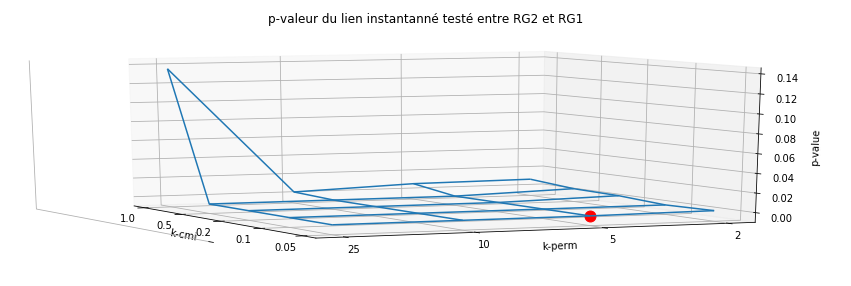

Optimum pour k-CMI = 0.05 et k-perm = 5


In [10]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(kcmi3d,kperm3d,p_RG2,rstride=1, cstride=1)

ind = np.unravel_index(np.argmin(p_RG2), p_RG2.shape)
ax.scatter(ind[0],ind[1],p_RG2.min(),color='r',s=120)

ax.set_title('p-valeur du lien instantanné testé entre RG2 et RG1')
ax.set_xlabel('k-cmi')
ax.set_ylabel('k-perm')
ax.set_zlabel('p-value')

plt.xticks(np.arange(5),kcmi)
plt.yticks(np.arange(5),kperm)

ax.view_init(10, 155)
plt.show()

print('\033[31m''Optimum''\033[30m''\033[1m'' pour k-CMI =',kcmi[ind[0]], 'et k-perm =',kperm[ind[1]])

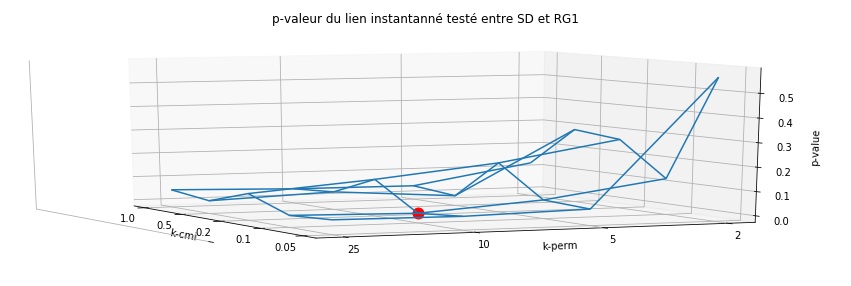

Optimum pour k-CMI = 0.1 et k-perm = 10


In [11]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(kcmi3d,kperm3d,p_SD,rstride=1, cstride=1)

ind = np.unravel_index(np.argmin(p_SD), p_SD.shape)
ax.scatter(ind[0],ind[1],p_SD.min(),color='r',s=120)

ax.set_title('p-valeur du lien instantanné testé entre SD et RG1')
ax.set_xlabel('k-cmi')
ax.set_ylabel('k-perm')
ax.set_zlabel('p-value')

plt.xticks(np.arange(5),kcmi)
plt.yticks(np.arange(5),kperm)

ax.view_init(10, 155)
plt.show()

print('\033[31m''Optimum''\033[30m''\033[1m'' pour k-CMI =',kcmi[ind[0]], 'et k-perm =',kperm[ind[1]])

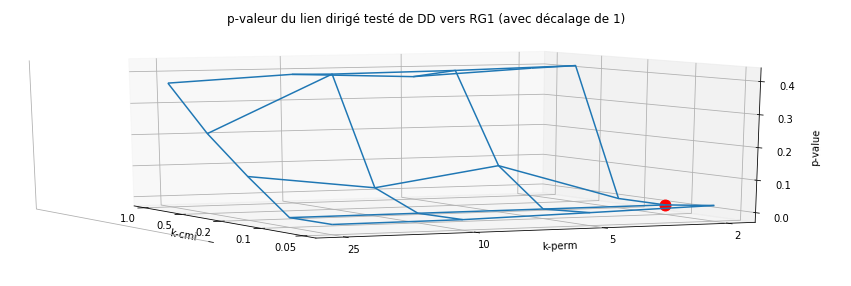

Optimum pour k-CMI = 0.1 et k-perm = 2


In [12]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(kcmi3d,kperm3d,p_DD,rstride=1, cstride=1)

ind = np.unravel_index(np.argmin(p_DD), p_DD.shape)
ax.scatter(ind[0],ind[1],p_DD.min(),color='r',s=120)

ax.set_title('p-valeur du lien dirigé testé de DD vers RG1 (avec décalage de 1)')
ax.set_xlabel('k-cmi')
ax.set_ylabel('k-perm')
ax.set_zlabel('p-value')

plt.xticks(np.arange(5),kcmi)
plt.yticks(np.arange(5),kperm)

ax.view_init(10, 155)
plt.show()

print('\033[31m''Optimum''\033[30m''\033[1m'' pour k-CMI =',kcmi[ind[0]], 'et k-perm =',kperm[ind[1]])

# Analyse de sensibilité sur les valeurs de l'estimateur I chapeau : val_matrix ?

## Analyse plus fine : 10 valeurs ou plus pour chaque paramètre